In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import pickle

In [2]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [4]:
# zu Beginn sind die Werte von y und z "umgekehrt"
# daher für systematische Berechnung diese ersten Einträge löschen
# eventuell Data Story daraus machen
df[5780:5800]

,time,x,y,z,day_number,day_name
5780,2022-01-28 10:39:17.450,0.140,4.113,0.251,4,Freitag
5781,2022-01-28 10:39:17.690,0.144,4.108,0.235,4,Freitag
5782,2022-01-28 10:39:17.892,0.138,4.093,0.242,4,Freitag
5783,2022-01-28 10:39:18.102,0.130,4.108,0.267,4,Freitag
5784,2022-01-28 10:39:18.312,0.151,4.118,0.242,4,Freitag
5785,2022-01-28 10:39:18.575,0.143,4.113,0.241,4,Freitag
5786,2022-01-28 10:39:18.815,0.126,4.492,0.289,4,Freitag
5787,2022-01-28 10:39:19.115,0.128,4.098,0.377,4,Freitag
5788,2022-01-28 10:39:19.497,0.120,3.427,-0.353,4,Freitag
5789,2022-01-28 10:39:19.670,0.452,6.047,0.830,4,Freitag


In [4]:
df = df.iloc[5791:]

In [5]:
df.reset_index(inplace=True, drop=True)

In [6]:
df.head()

,time,x,y,z,day_number,day_name
0,2022-01-28 10:39:28.532,0.242,0.053,4.267,4,Freitag
1,2022-01-28 10:39:28.742,0.245,0.066,4.292,4,Freitag
2,2022-01-28 10:39:28.915,0.261,0.092,4.271,4,Freitag
3,2022-01-28 10:39:29.237,0.240,0.083,4.260,4,Freitag
4,2022-01-28 10:39:29.455,0.270,0.086,4.258,4,Freitag


In [20]:
for intersection in range(6200,6400):
    print((df.x[intersection] + df.y[intersection] + df.z[intersection]) / 3)

1.5236666339139144
1.5356666073203087
1.5326666484276457
1.5216666460037231
1.5059999612470467
1.51533334578077
1.5130000226199627
1.5109999490280945
1.5183333593110244
1.5309999808669092
1.5303333898385365
1.5146666280925274
1.5163333987196286
1.5256667335828145
1.5333332816759746
1.5273333142201106
1.5359999214609463
1.5270000261565049
1.5220000719030697
1.5249999314546585
1.5056666284799576
1.5300000657637913
1.5079999317725499
1.5203334117929141
1.529333325723807
1.519333337744077
1.5296666001280148
1.5346666400631268
1.5196667363246281
1.5290000413854916
1.530666645616293
1.5170000543196995
1.5283333609501522
1.5293333902955055
1.5313332850734394
1.5173333610097568
1.5263333370288212
1.7479999760786693
1.5116666282216709
1.512999963015318
1.546000028649966
1.516666726519664
1.5176667235791683
1.5423332850138347
1.5370000277956326
1.51866664737463
1.5186666374405224
1.4943333379924297
1.6316667497158053
2.556333283583323
1.6729999681313832
0.8923333287239074
1.0040000279744465
1.81

In [7]:
# Spalte Status definieren, der später für jede Situation einen anderen Wert annimmt
df['Status'] = 0

In [92]:
df.quantile(0.99)

x                    0.359
y                    0.090
z                    4.307
day_number           6.000
kaffee_ausgeben      0.000
kaffee_und_wasser    0.000
undefiniert          0.000
Name: 0.99, dtype: float64

In [93]:
df.quantile(1 - 0.99)

x                    0.171
y                   -0.008
z                    4.234
day_number           0.000
kaffee_ausgeben      0.000
kaffee_und_wasser    0.000
undefiniert          0.000
Name: 0.010000000000000009, dtype: float64

In [105]:
# Labeln der Daten notwendig, um Modell zu trainieren...
# 1. Versuch mit Hilfe eines Moving Average
# Je nach Durchschnittswert einer der drei Klassen mit One Hot encoding zuordnen
# Problem: ist der Durchschnittswert konstant oder unterschiedlich, wenn Kaffee gemacht wird

# die ganze Idee macht keinen Sinn, da Moving Average immer bei ca. 1,5...
# man braucht andere Metrik als den Mittelwert. Eventuell einfach zählen, wie oft Wert von x, y, z in einem Abschnitt hoch bzw. niedrig ist

intersection = 4000
one_part = df[intersection-350 : intersection]
#avg = (np.mean(one_part.x) + np.mean(one_part.y) + np.mean(one_part.z)) / 3
count = (one_part[(one_part.x > 0.359) | (one_part.x < 0.171)].count()[0]) + \
        (one_part[(one_part.y > 0.09) | (one_part.y < -0.008)].count()[0]) + \
        (one_part[(one_part.z > 4.307) | (one_part.z < 4.234)].count()[0])
print(count)

55


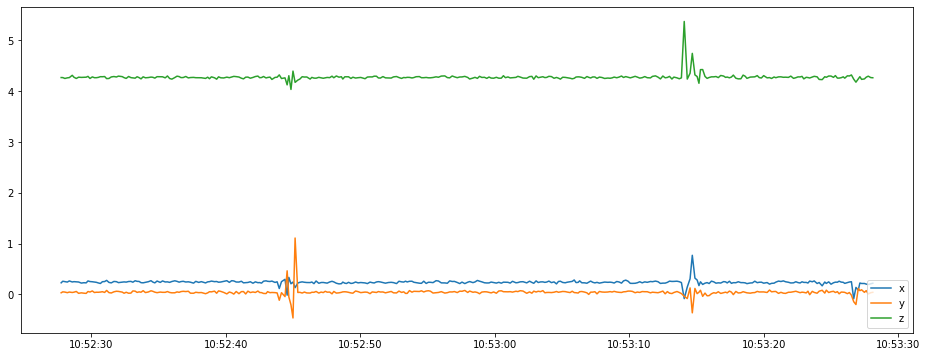

In [106]:
# Ausschnitt bei dem Kaffee gemacht wird
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-350 : intersection], df.x[intersection-350 : intersection], label="x")
ax.plot(df.time[intersection-350 : intersection], df.y[intersection-350 : intersection], label='y')
ax.plot(df.time[intersection-350 : intersection], df.z[intersection-350 : intersection], label='z')

plt.legend(loc=4)

In [8]:
intersection = 350

while intersection < len(df):
    offset = 0
    intersection_value = (df.x[intersection] + df.y[intersection] + df.z[intersection]) / 3
    if (intersection_value > 1.48 or intersection_value < 1.54):
        one_part = df[intersection-350 : intersection]
        #avg = (np.mean(one_part.x) + np.mean(one_part.y) + np.mean(one_part.z)) / 3
        count_small = (one_part[(one_part.x > 0.359) | (one_part.x < 0.171)].count()[0]) + \
                (one_part[(one_part.y > 0.090) | (one_part.y < -0.008)].count()[0]) + \
                (one_part[(one_part.z > 4.307) | (one_part.z < 4.234)].count()[0])
        count_big = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
                (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
                (one_part[(one_part.z > 8) | (one_part.z < 0)].count()[0])
        
        if (count_small < 100 and count_big < 1):
            df.Status[intersection-350:intersection] = 0    # Leerlauf
        elif (count_small < 100 and count_big >= 1):
            df.Status[intersection-350:intersection] = 1    # undefiniert (ein hoher Ausschlag)
        elif (count_small < 400):
            df.Status[intersection-350:intersection] = 2    # Kaffee ausgeben
        elif (count_small >= 400):
            df.Status[intersection-350:intersection] = 3    # Kaffee ausgeben und Wasser nachziehen

        intersection += 350
    else:   # Wenn bei Schnittpunkt Durchschnitt aus X,Y und Z hoch, den Schnittpunkt um 10 Sekunden nach hinten setzen
        # hier eigentlich eine For oder While-Schleife, damit solange nach hinten verschoben wird, bis der Wert wieder normal ist
        # für Einfachheit Schnittpunkt erstmal nur einmalig nach hinten setzen
        offset = 60      
        one_part = df[intersection-350:intersection+offset]
        #avg = (np.mean(one_part.x) + np.mean(one_part.y) + np.mean(one_part.z)) / 3
        count_small = (one_part[(one_part.x > 0.359) | (one_part.x < 0.171)].count()[0]) + \
                (one_part[(one_part.y > 0.090) | (one_part.y < -0.008)].count()[0]) + \
                (one_part[(one_part.z > 4.307) | (one_part.z < 4.234)].count()[0])
        count_big = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
                (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
                (one_part[(one_part.z > 8) | (one_part.z < 0)].count()[0])
        
        if (count_small < 100 and count_big < 1):
            df.Status[intersection-350:intersection+offset] = 0
        elif (count_small < 100  and count_big >= 1):
            df.Status[intersection-350:intersection+offset] = 1
        elif (count_small < 400):
            df.Status[intersection-350:intersection+offset] = 2
        elif (count_small >= 400):
            df.Status[intersection-350:intersection+offset] = 3

        intersection += 410

C:\Users\pauls\AppData\Local\Temp/ipykernel_3980/680561490.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[intersection-350:intersection] = 0    # Leerlauf
C:\Users\pauls\AppData\Local\Temp/ipykernel_3980/680561490.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[intersection-350:intersection] = 3    # Kaffee ausgeben und Wasser nachziehen
C:\Users\pauls\AppData\Local\Temp/ipykernel_3980/680561490.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [10]:
df.head()

,time,x,y,z,day_number,day_name,Status
0,2022-01-28 10:39:28.532,0.242,0.053,4.267,4,Freitag,0
1,2022-01-28 10:39:28.742,0.245,0.066,4.292,4,Freitag,0
2,2022-01-28 10:39:28.915,0.261,0.092,4.271,4,Freitag,0
3,2022-01-28 10:39:29.237,0.240,0.083,4.260,4,Freitag,0
4,2022-01-28 10:39:29.455,0.270,0.086,4.258,4,Freitag,0


In [9]:
leerlauf = df[df.Status == 0]
undefiniert = df[df.Status == 1]
kaffee = df[df.Status == 2]
kaffee_und_wasser = df[df.Status == 3]

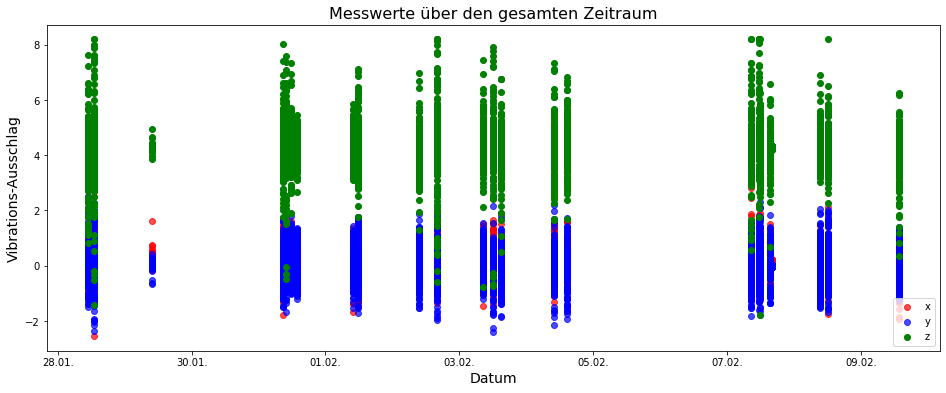

In [13]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(kaffee_und_wasser.time, kaffee_und_wasser.x, color='red', label='x', alpha=0.7)
ax.scatter(kaffee_und_wasser.time, kaffee_und_wasser.y, color='blue', label='y', alpha=0.7)
ax.scatter(kaffee_und_wasser.time, kaffee_und_wasser.z, color='green', label='z')

plt.legend(loc=4)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)    
ax.set_title("Messwerte über den gesamten Zeitraum", fontsize=16)  

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

In [20]:
a = df['time'][100000] - df['time'][0]

In [28]:
a < timedelta(days=0, hours=5)

False

In [73]:
kaffee_und_wasser

,time,x,y,z,day_number,day_name,Status
350,2022-01-28 10:40:41.597,0.266,0.084,4.248,4,Freitag,3
351,2022-01-28 10:40:41.770,0.261,0.057,4.248,4,Freitag,3
352,2022-01-28 10:40:41.965,0.253,0.065,4.279,4,Freitag,3
353,2022-01-28 10:40:42.137,0.230,0.073,4.293,4,Freitag,3
354,2022-01-28 10:40:42.355,0.232,0.081,4.287,4,Freitag,3
...,...,...,...,...,...,...,...
5565345,2022-02-09 13:45:06.451,0.222,0.023,4.267,2,Mittwoch,3
5565346,2022-02-09 13:45:06.631,0.214,0.014,4.279,2,Mittwoch,3
5565347,2022-02-09 13:45:06.811,0.261,0.018,4.255,2,Mittwoch,3
5565348,2022-02-09 13:45:06.946,0.236,0.000,4.265,2,Mittwoch,3


In [39]:
kaffee_und_wasser['time'][0:1]

350   2022-01-28 10:40:41.597
Name: time, dtype: datetime64[ns]

In [10]:
kaffee_und_wasser.reset_index(inplace=True, drop=True)

In [60]:
kaffee_und_wasser['time'].iloc[1] - kaffee_und_wasser['time'].iloc[0] 

Timedelta('0 days 00:00:00.173000')

In [64]:
len(kaffee_und_wasser)

21350

In [22]:
for i in kaffee_und_wasser.items():
    print(i)

('time', 0       2022-01-28 10:40:41.597
1       2022-01-28 10:40:41.770
2       2022-01-28 10:40:41.965
3       2022-01-28 10:40:42.137
4       2022-01-28 10:40:42.355
                  ...          
21345   2022-02-09 13:45:06.451
21346   2022-02-09 13:45:06.631
21347   2022-02-09 13:45:06.811
21348   2022-02-09 13:45:06.946
21349   2022-02-09 13:45:07.133
Name: time, Length: 21350, dtype: datetime64[ns])
('x', 0        0.266
1        0.261
2        0.253
3        0.230
4        0.232
         ...  
21345    0.222
21346    0.214
21347    0.261
21348    0.236
21349    0.202
Name: x, Length: 21350, dtype: float64)
('y', 0        0.084
1        0.057
2        0.065
3        0.073
4        0.081
         ...  
21345    0.023
21346    0.014
21347    0.018
21348    0.000
21349    0.024
Name: y, Length: 21350, dtype: float64)
('z', 0        4.248
1        4.248
2        4.279
3        4.293
4        4.287
         ...  
21345    4.267
21346    4.279
21347    4.255
21348    4.265
21349    4.

C:\Users\pauls\AppData\Local\Temp/ipykernel_3980/1577847133.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,6))


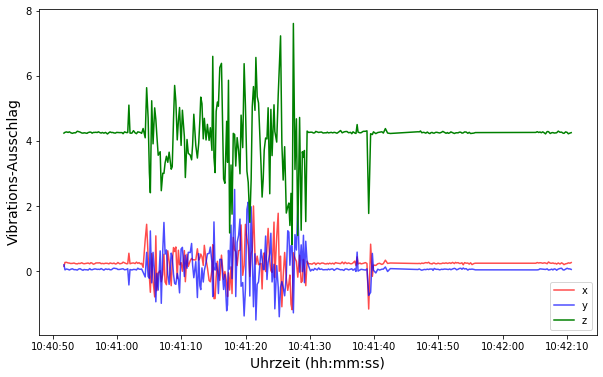

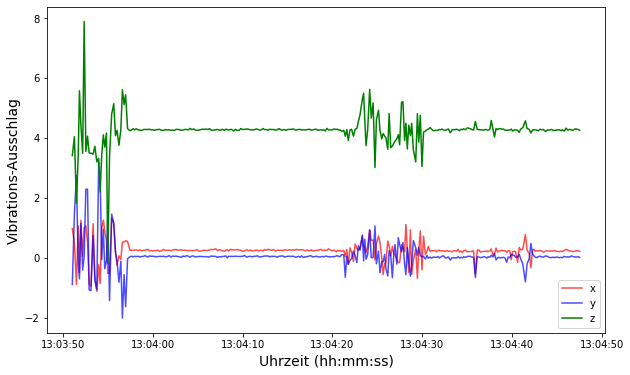

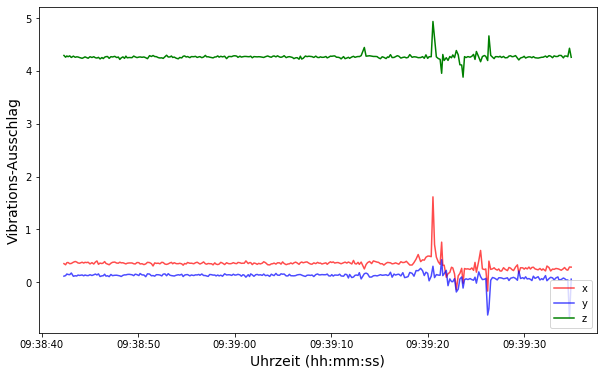

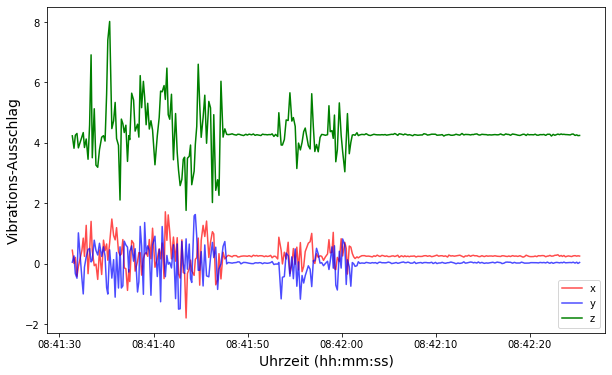

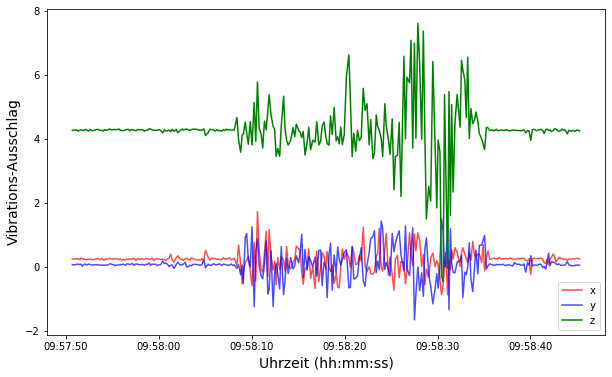

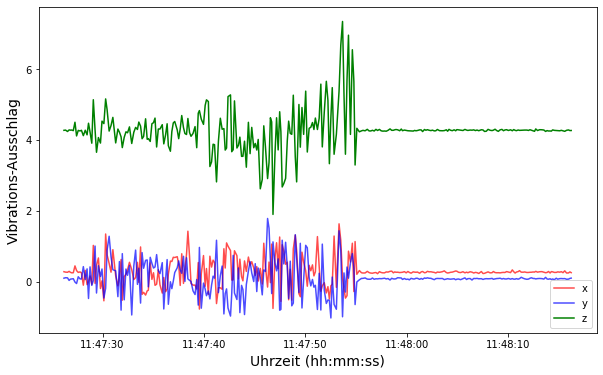

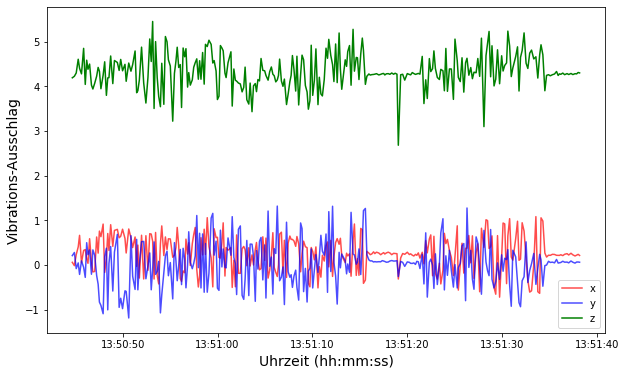

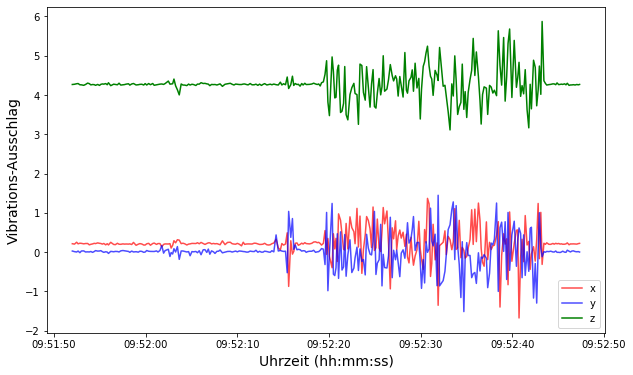

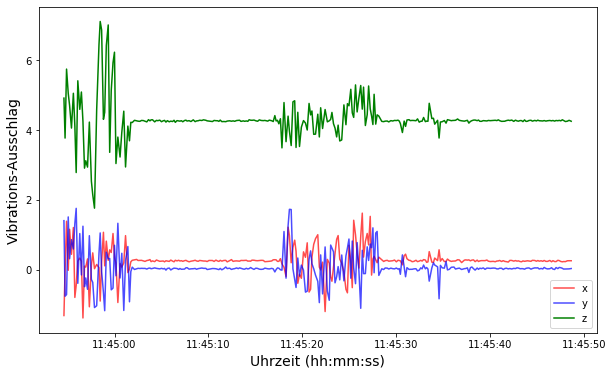

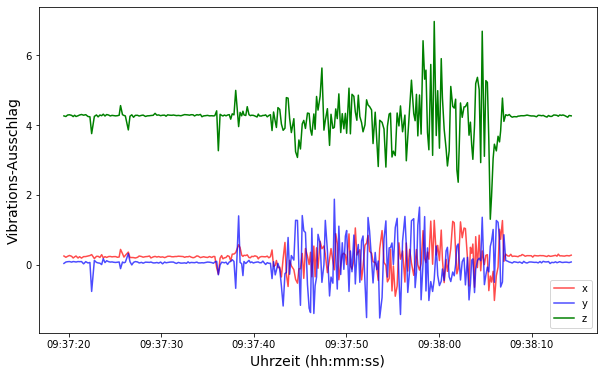

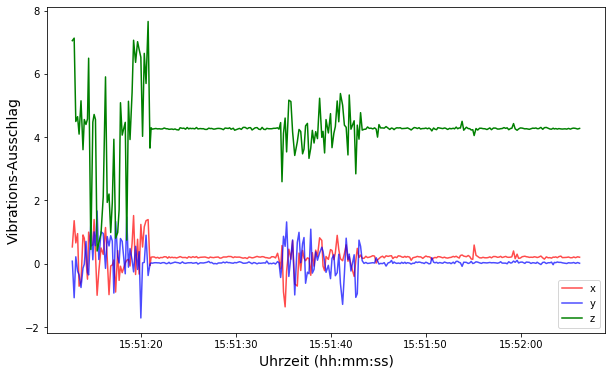

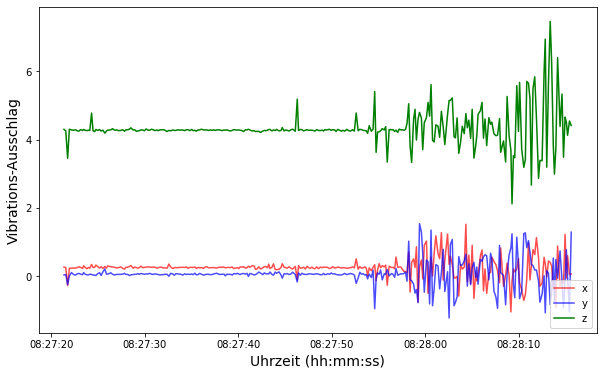

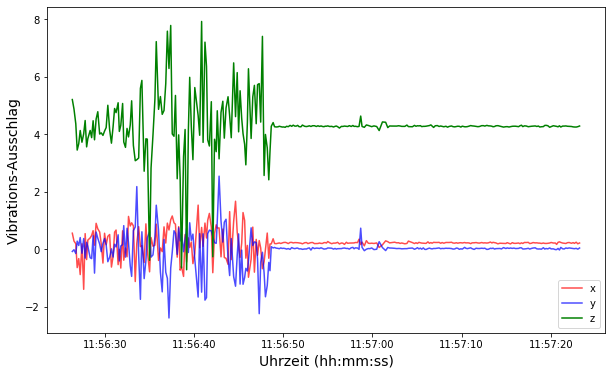

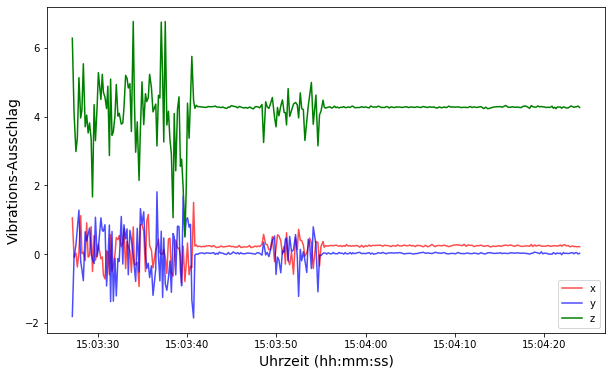

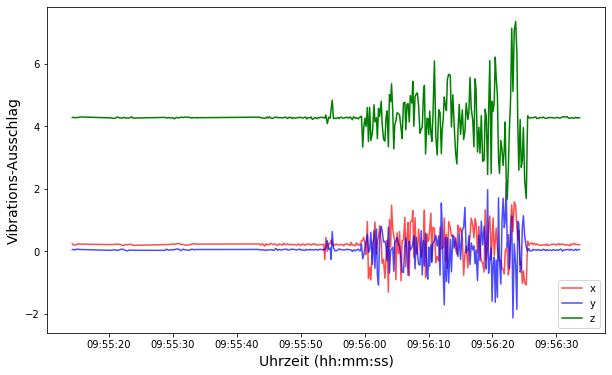

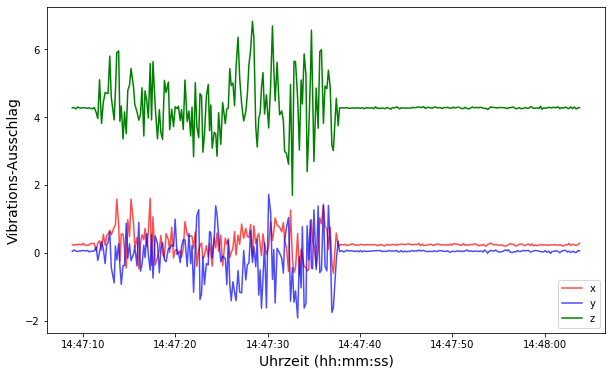

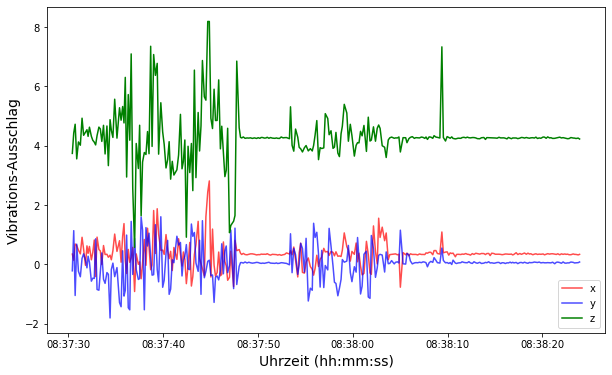

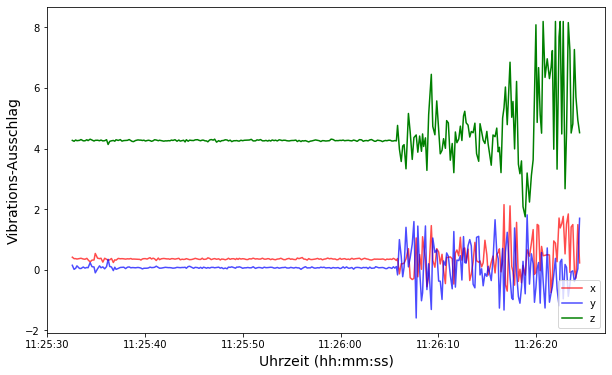

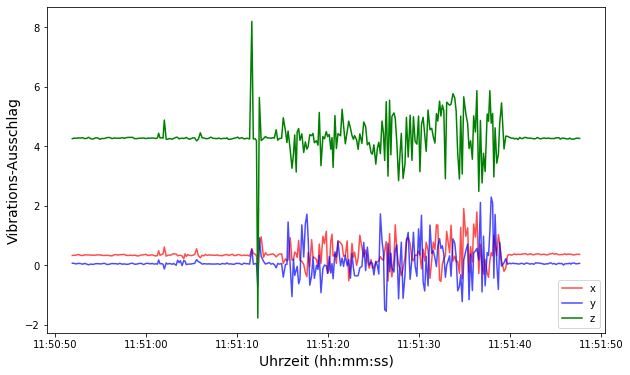

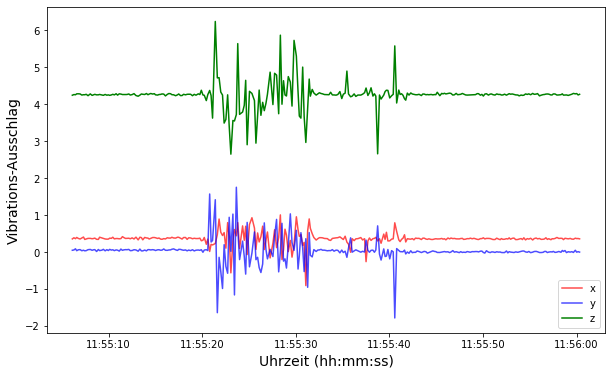

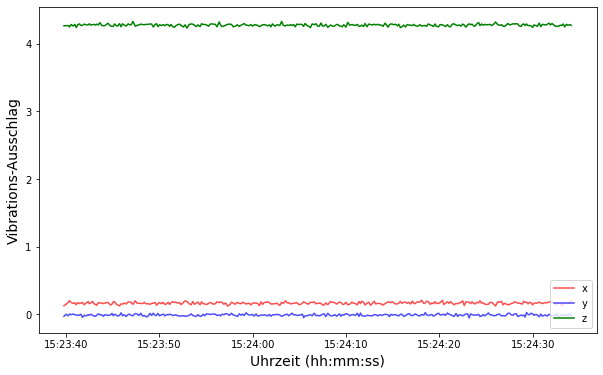

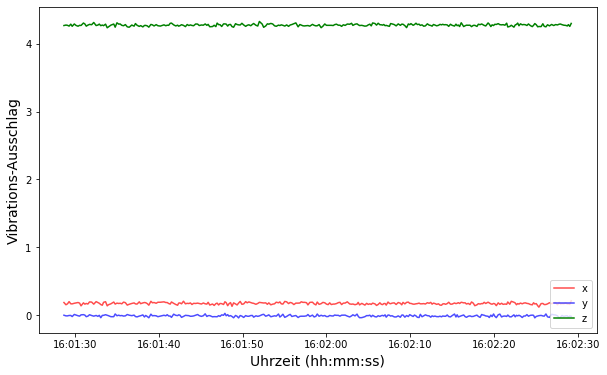

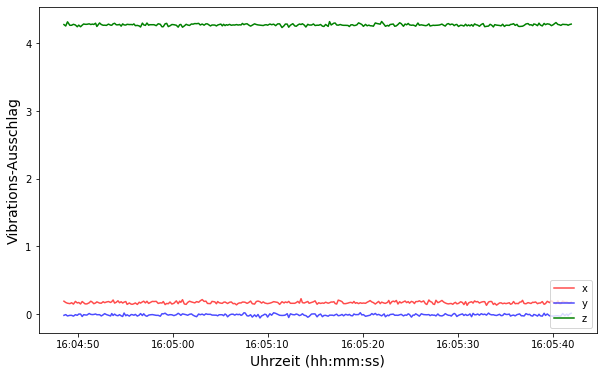

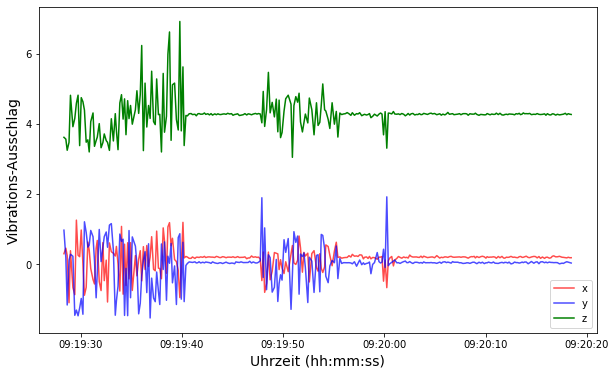

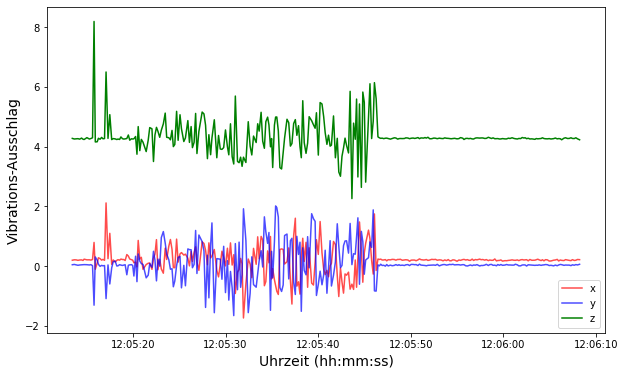

In [28]:
for index, elem in enumerate(kaffee_und_wasser.iterrows()):
    if (index+1 < len(kaffee_und_wasser) and index - 1 >= 0):
        prev_time = kaffee_und_wasser['time'][index-1]
        curr_time = kaffee_und_wasser['time'][index]

        delta = curr_time - prev_time


    if (delta > timedelta(minutes=2)):
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(kaffee_und_wasser.time[index - 300: index], kaffee_und_wasser.x[index - 300: index], color='red', label='x', alpha=0.7)
        ax.plot(kaffee_und_wasser.time[index - 300: index], kaffee_und_wasser.y[index - 300: index], color='blue', label='y', alpha=0.7)
        ax.plot(kaffee_und_wasser.time[index - 300: index], kaffee_und_wasser.z[index - 300: index], color='green', label='z')

        plt.legend(loc=4)
        ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
        ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)

In [146]:
X = df[['x','y','z']]
y = df[['Status']]

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [148]:
# importing classifier
from sklearn.naive_bayes import GaussianNB

# initializaing the NB
classifer = GaussianNB()

# training the model
classifer.fit(X_train, y_train)

# testing the model
y_pred = classifer.predict(X_test)

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.9686707625422213


In [ ]:
# Der Score ist gut
# ABER: Die Labels wurden mit einfachen Funktion und nicht per Hand gemacht. Das heißt schon da können Fehler auftreten
# Außerdem ist bestimmt zu 95% der Zeit oder mehr die Maschine im Leerlauf. Das heißt, wenn Modell immer Leerlauf vorhersagt, hat man schon eine Genauigkeit von 95%

In [150]:
y_test

,Status
5005468,0
1853282,0
1212186,0
3255198,0
2460041,0
...,...
4740026,2
670614,0
1447641,0
5128345,0


In [142]:
y_test['predict'] = y_pred
wrong_pred = y_test[y_test.Status != y_test.predict]

In [132]:
wrong_pred

,Status,predict
4696543,2,0
4730699,2,0
4736697,2,0
2886076,2,0
4662709,2,0
...,...,...
2886953,2,0
4773613,2,0
4750066,2,0
4752724,2,0


In [135]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1396035, 2: 3470, 3: 1742}

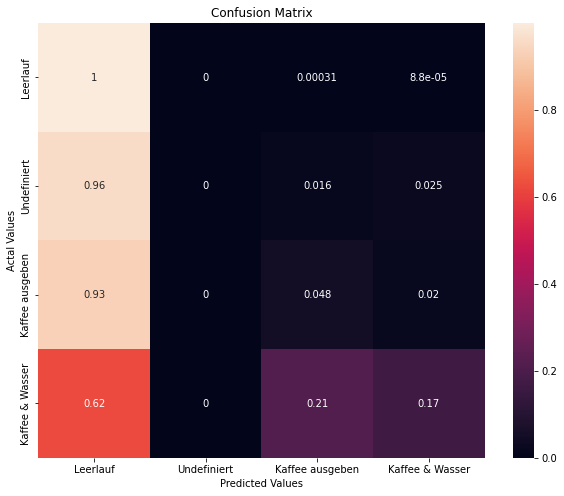

In [153]:
from sklearn.metrics import confusion_matrix

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
# In Prozent:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Leerlauf','Undefiniert','Kaffee ausgeben', 'Kaffee & Wasser'], 
                     columns = ['Leerlauf','Undefiniert','Kaffee ausgeben', 'Kaffee & Wasser'])

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()